### Algorithme des $k$-moyennes

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


On donne la fonction suivante :

In [3]:
def generate(n,mx,sx,my,sy,alpha):
    X = np.random.randn(n*2).reshape((n,2))
    X = X*np.array([sx,sy])
    r = np.array([[np.cos(alpha), -np.sin(alpha)],[np.sin(alpha),np.cos(alpha)]])
    X = X@r
    X = X+np.array([mx,my])
    return X

Interprétez son code. 

Testez-là en visualisant le nuage de points qu'elle produit en faisant varier ses paramètres.

Déduisez-en le rôle des paramètres.

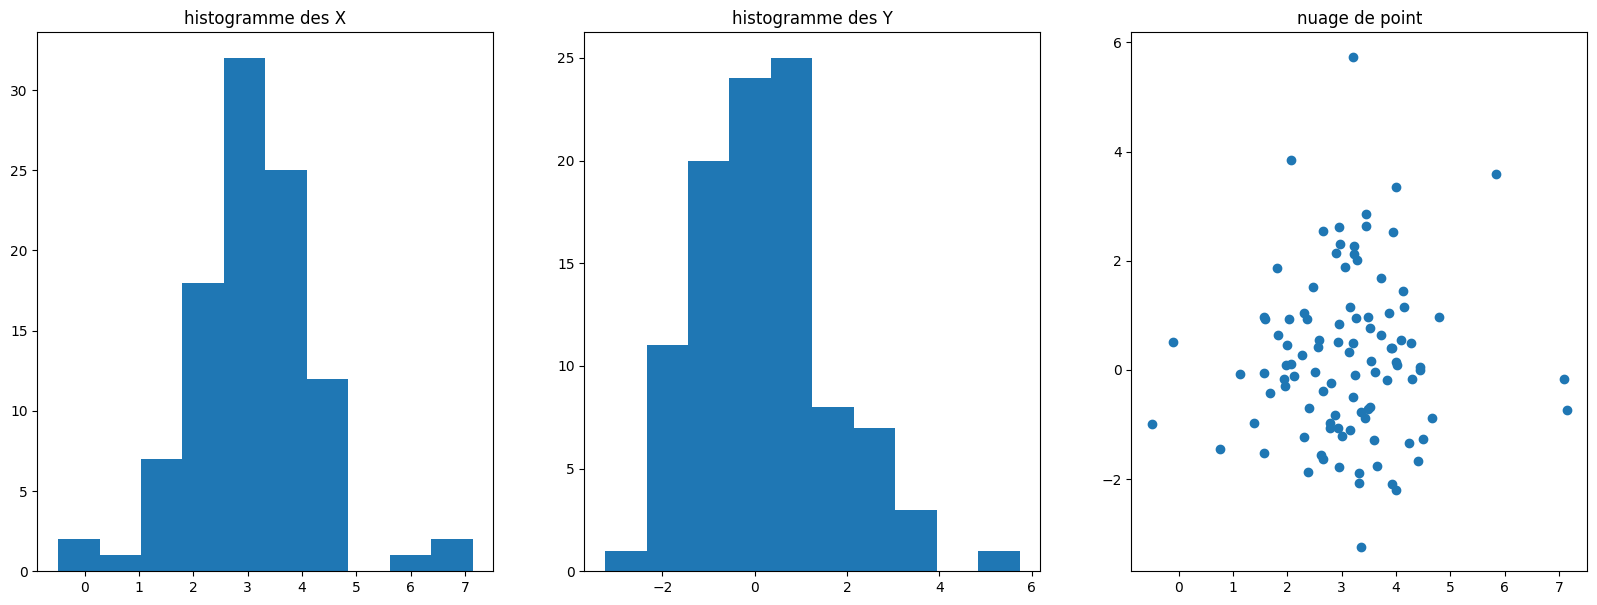

In [4]:
# Utilisez cette cellule pour tester l'exécution de la fonction generate
points = generate(100, 3, 1, .5, 1.5, 0)


plt.figure(figsize=(20, 7))
plt.subplot(131)
plt.title("histogramme des X")
plt.hist(x=points[:, 0])

plt.subplot(132)
plt.title("histogramme des Y")
plt.hist(x=points[:, 1])

plt.subplot(133)
plt.title("nuage de point")
plt.scatter(x=points[:,0], y=points[:,1])

Effet de l'angle

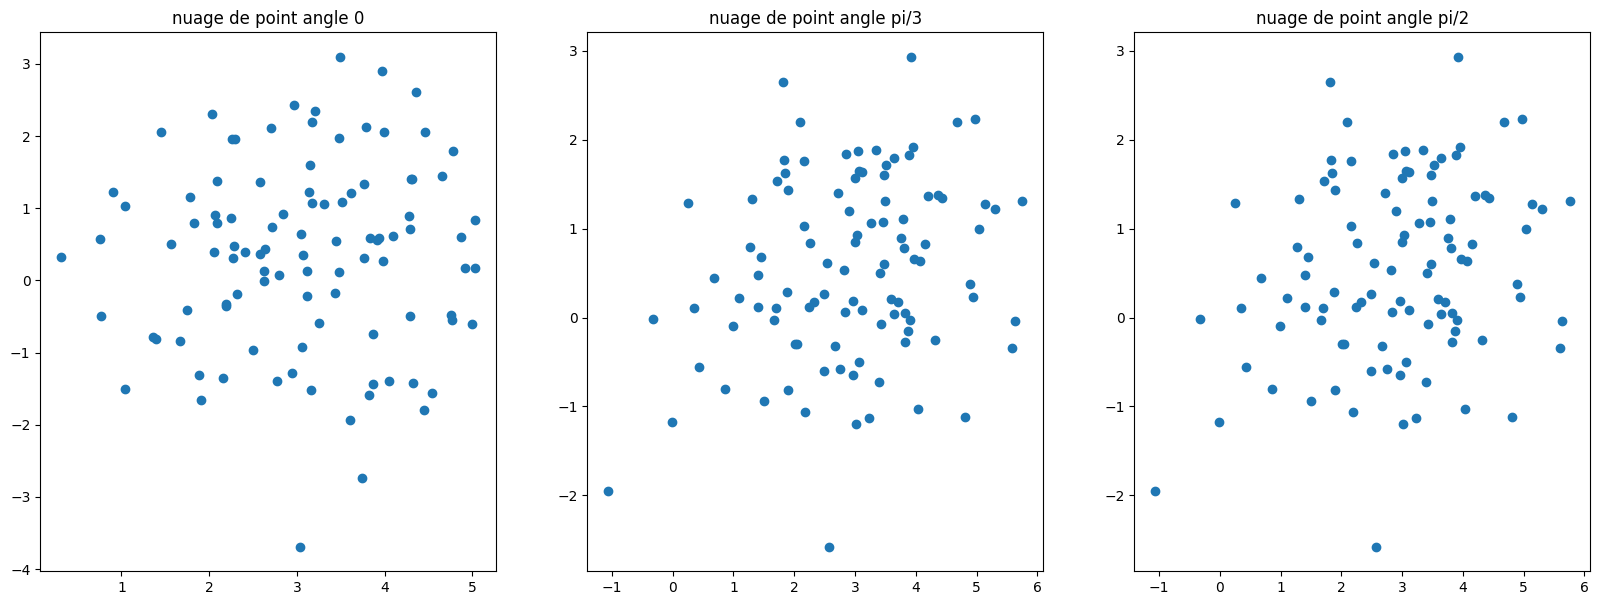

In [5]:


points_0 = generate(100, 3, 1, .5, 1.5, 0)
points_1 = generate(100, 3, 1, .5, 1.5, np.pi/3)

points_2 = generate(100, 3, 1, .5, 1.5, np.pi/2)

plt.figure(figsize=(20, 7))

plt.subplot(131)
plt.title("nuage de point angle 0")
plt.scatter(x=points_0[:,0], y=points_0[:,1])

plt.subplot(132)
plt.title("nuage de point angle pi/3" )
plt.scatter(x=points_1[:,0], y=points_1[:,1])

plt.subplot(133)
plt.title("nuage de point angle pi/2" )
plt.scatter(x=points_1[:,0], y=points_1[:,1])


Dans cette cellule, expliquez le fonctionnement de la fonction `generate` et indiquez la signification de ses paramètres.

## Constitution d'un jeu de données

In [6]:
X1 = generate(30,0,1.5,7,1,np.pi/3)
X2 = generate(30,-5,1,-4,.4,-np.pi/4)
X3 = generate(30,7,1,-1,.8,np.pi/4)

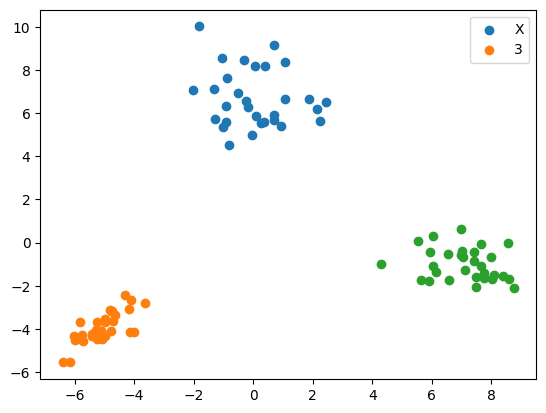

In [7]:
plt.figure()
plt.legend("X1")
plt.scatter(X1[:,0],X1[:,1])
plt.legend("X2")
plt.scatter(X2[:,0],X2[:,1])
plt.legend("X3")
plt.scatter(X3[:,0],X3[:,1])

Constituez un dataframe pandas disposant de deux colonnes 'x' et 'y' constitué des valeurs de `X1`, `X2` et `X3` dont l'ordre sera aléatoire.

Vous utiliserez les fonctions `numpy.concatenate` et `np.random.shuffle`

In [8]:
X = np.concatenate([X1, X2, X3])
np.random.shuffle(X)
print(X)

[[ 3.67799461e-01  5.60146981e+00]
 [-2.35297144e-01  6.55208700e+00]
 [ 6.59260995e+00 -1.74389082e+00]
 [ 7.42358940e+00 -4.45734921e-01]
 [ 7.05887102e-01  9.14694308e+00]
 [ 7.41983193e+00 -8.67890063e-01]
 [ 2.43395705e+00  6.52400423e+00]
 [-6.01717398e+00 -4.32875514e+00]
 [ 6.14026848e+00 -1.37740002e+00]
 [ 7.12236014e+00 -1.27392895e+00]
 [-5.40196546e+00 -4.31059075e+00]
 [ 2.68727716e-01  5.53174847e+00]
 [ 8.55908575e+00 -9.71403447e-03]
 [-5.23443100e+00 -3.66083835e+00]
 [-4.64424163e+00 -3.33400219e+00]
 [ 6.95841702e-01  5.67638145e+00]
 [-1.80879472e+00  1.00117997e+01]
 [ 2.22884777e+00  5.64439214e+00]
 [-5.23040562e+00 -4.45878301e+00]
 [-4.18620981e+00 -3.07471706e+00]
 [ 6.02579481e+00  3.22645914e-01]
 [ 7.47041407e+00 -2.05322981e+00]
 [-5.74222448e+00 -4.26103253e+00]
 [ 8.07661306e+00 -1.48629672e+00]
 [ 6.55961705e+00 -5.15970979e-01]
 [-1.29941656e+00  7.13453427e+00]
 [ 5.54219781e+00  9.27014231e-02]
 [-4.01138379e+00 -4.12868179e+00]
 [-1.01859899e+00  5

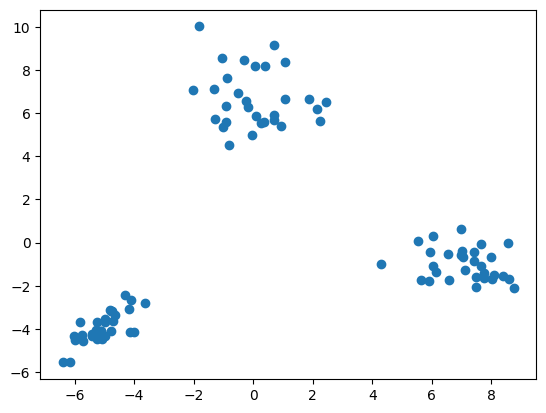

In [9]:
plt.scatter(X[:, 0], X[:, 1])

In [10]:
df = pd.DataFrame(data=X, columns=["X", "Y"])
df

,X,Y
0,0.367799,5.601470
1,-0.235297,6.552087
2,6.592610,-1.743891
3,7.423589,-0.445735
4,0.705887,9.146943
...,...,...
85,1.076962,6.632962
86,-0.493094,6.920543
87,-0.054411,4.962786
88,-5.096072,-4.097206


Ajoutez une colonne `cluster` à votre dataframe dont la valeur sera initialisée aléatoirement par un entier compris entre 0 inclus et k exclus, k étant un paramètre.

In [11]:
df["cluster"] = np.random.randint(0, 3, len(df))
df

,X,Y,cluster
0,0.367799,5.601470,2
1,-0.235297,6.552087,0
2,6.592610,-1.743891,1
3,7.423589,-0.445735,1
4,0.705887,9.146943,2
...,...,...,...
85,1.076962,6.632962,0
86,-0.493094,6.920543,1
87,-0.054411,4.962786,1
88,-5.096072,-4.097206,0


Générez le dictionnaire `means` dont les clés seront les valeurs de 0 à k exclus et dont les valeurs seront les moyennes des colonnes `x` et `y` pour les données du dataframe dont la valeur de `cluster` sera celle de la clé.

In [12]:
def compute_mean(df, feature=["X", "Y"], class_column="cluster"):
    mean_df = df.groupby(class_column).mean()
    means = {i : tuple(mean_df[feature].iloc[i]) for i in range(len(mean_df))}
    return means

means = compute_mean(df)
means

{0: (-0.6693908619077821, 0.2586084900486853),
 1: (1.3707401205136418, 0.3184440537060117),
 2: (1.517391867409393, 1.655218058229405)}

Implantez une fonction calculant la distance euclidienne entre deux points

In [13]:

def dist(p1, p2):
    return np.sqrt(np.sum(p1-p2)**2)


Implantez une fonction qui pour un point donné, retourne la clé associée à la moyenne la plus proche

In [14]:
def get_near_mean(p, means, axis=1):
    distances = [dist(p , np.array(means[i])) for i in means]
    return np.argmin(distances)

Initialisez une nouvelle colonne `new_cluster` dont la valeur sera l'indice de la moyenne la plus proche pour chaque point.

In [15]:
df["new_cluster"] = df[["X", "Y"]].apply(get_near_mean, args=(means,), axis=1)
df

,X,Y,cluster,new_cluster
0,0.367799,5.601470,2,2
1,-0.235297,6.552087,0,2
2,6.592610,-1.743891,1,2
3,7.423589,-0.445735,1,2
4,0.705887,9.146943,2,2
...,...,...,...,...
85,1.076962,6.632962,0,2
86,-0.493094,6.920543,1,2
87,-0.054411,4.962786,1,2
88,-5.096072,-4.097206,0,0


In [16]:
df

,X,Y,cluster,new_cluster
0,0.367799,5.601470,2,2
1,-0.235297,6.552087,0,2
2,6.592610,-1.743891,1,2
3,7.423589,-0.445735,1,2
4,0.705887,9.146943,2,2
...,...,...,...,...
85,1.076962,6.632962,0,2
86,-0.493094,6.920543,1,2
87,-0.054411,4.962786,1,2
88,-5.096072,-4.097206,0,0


Finalement, implantez l'algorithme des $k$-moyennes en itérant tant que la colonne `new_cluster` est différente de la colonne `cluster`, cette dernière étant mise à jour à chaque itération.

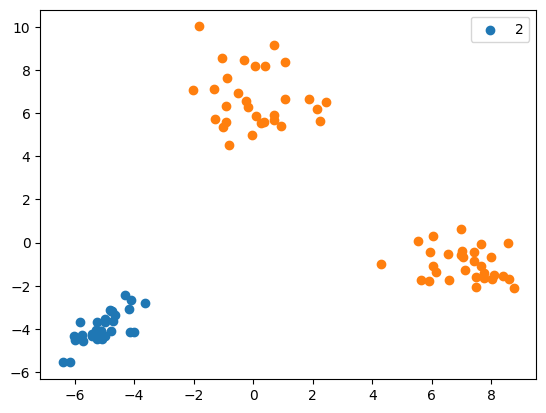

In [17]:
while (df["cluster"]-df["new_cluster"]).sum()!= 0:
    df["cluster"] = df["new_cluster"]
    means = compute_mean(df)
    df["new_cluster"] = df[["X", "Y"]].apply(get_near_mean, args=(means,), axis=1)

class0 = df[df["cluster"] == 0.0 ]
class1 = df[df["cluster"] == 1.0 ]
class2 = df[df["cluster"] == 2.0 ]

plt.figure()
plt.legend("0")
plt.scatter(class0["X"],class0["Y"])
plt.legend("1")
plt.scatter(class1["X"],class1["Y"])
plt.legend("2")
plt.scatter(class2["X"],class2["Y"])

Visualisez le partitionnement réalisé. 

Faites varier les valeurs de $k$.

Appliquez sur d'autres jeux de données que vous génèrerez.

In [73]:
def fit_kmean(df, k, feature=["X", "Y"], class_column = "cluster",new_class_column = "new_cluster"):
    
    df[class_column] = np.random.randint(0, k, len(df))
    means = compute_mean(df, feature)
    df[new_class_column] = df[feature].apply(get_near_mean,axis=1,   args=(means,) )
    
    while (df[class_column]-df[new_class_column]).sum()!= 0:
        df[class_column] = df[new_class_column]
        means = compute_mean(df, feature)
        df[new_class_column] = df[feature].apply(get_near_mean,axis=1,  args=(means, ))

   
    plt.figure()
    for i in range(k):
        cluster = df[df[class_column] ==  i][feature]
        cluster = cluster.to_numpy()
        plt.scatter(cluster[:, 0],cluster[:, 1], label=f"{i}")
    
    plt.legend()
    print(intra_cluster_distance(df, feature, class_column))

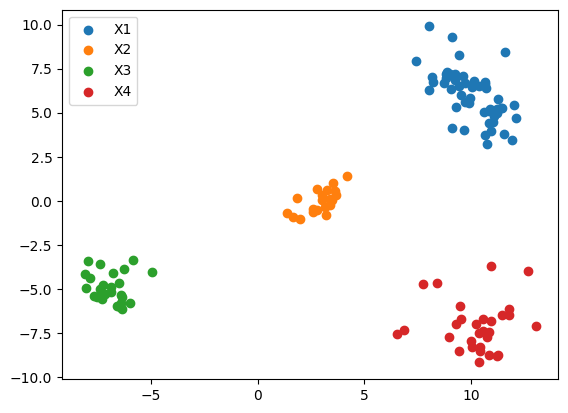

In [74]:
X1 = generate(50,10,1.5,6,1,np.pi/3)
X2 = generate(20,3 ,1.2,0,.4,-np.pi/4)
X3 = generate(25,-7,0.7,-5,.8,np.pi/4)
X4 = generate(30,10,1.7,-7,1.5,np.pi/4)

plt.figure()

plt.scatter(X1[:,0],X1[:,1], label="X1")
plt.scatter(X2[:,0],X2[:,1], label="X2")
plt.scatter(X3[:,0],X3[:,1], label="X3")
plt.scatter(X4[:,0],X4[:,1], label="X4")

plt.legend()

In [75]:
X = np.concatenate([X1, X2, X3, X4])


{1: 1641.301779715447, 0: 1146.660233475557, 3: 42.29646069573389, 2: 348.2761120815349}


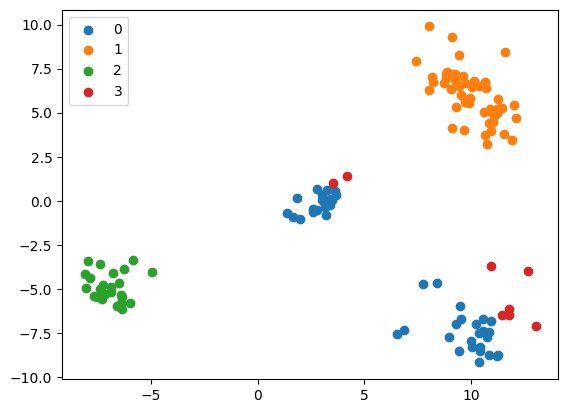

In [76]:
ndf = pd.DataFrame(data=X)

data_feature = ["Longueur", "Largeur"]
ndf.columns = data_feature

fit_kmean(ndf,4, feature=data_feature)

{0: 1641.301779715447, 1: 2370.736072562434, 2: 348.2761120815349}


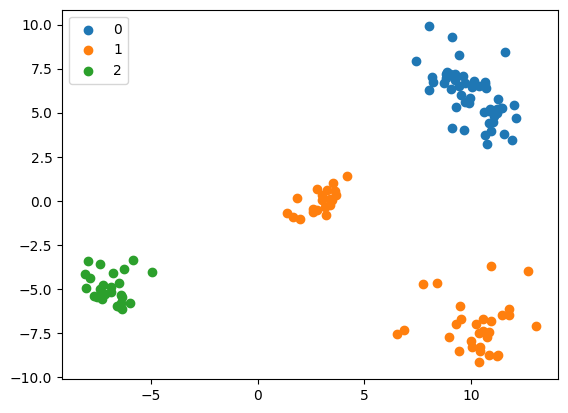

In [77]:
ndf = pd.DataFrame(data=X)

data_feature = ["Longueur", "Largeur"]
ndf.columns = data_feature

fit_kmean(ndf,3, feature=data_feature)

{0: 2452.736156979462, 1: 19795.32321540243}


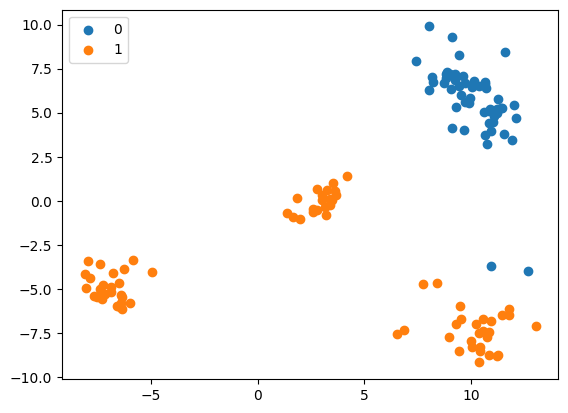

In [78]:
ndf = pd.DataFrame(data=X)

data_feature = ["Longueur", "Largeur"]
ndf.columns = data_feature

fit_kmean(ndf, 2, feature=data_feature)

Définissez une fonction qui calcule la somme des distances intra-clusters.

{1: 1641.301779715447, 3: 1146.660233475557, 2: 42.29646069573389, 0: 348.2761120815349}


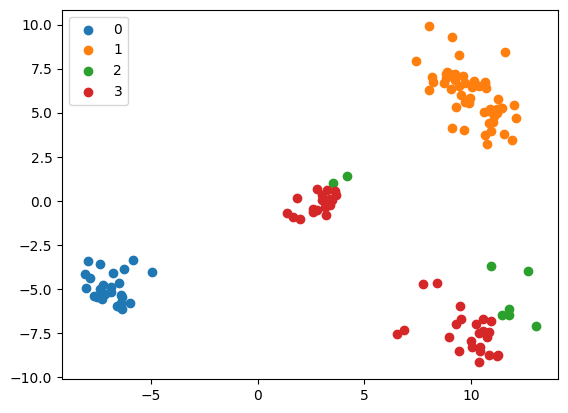

In [79]:
import itertools

def intra_cluster_distance(df, feature_column, cluster_column):
    clusters = df[cluster_column].unique()
    distances_sum = {}
    for cluster in clusters:
        df_cluster = df[feature_column][df[cluster_column] == cluster]

        feature = df_cluster[feature_column].to_numpy()
        comb = list(itertools.combinations(feature, 2))
        comarr = np.array([ np.array(uplet) for uplet in comb])

        distances_sum[cluster] = np.sum([dist(*comarr[i, :, :]) for i in range(comarr.shape[0])])
    return distances_sum



ndf = pd.DataFrame(data=X)

data_feature = ["Longueur", "Largeur"]
ndf.columns = data_feature


fit_kmean(ndf,4, feature=data_feature)
